In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import math

%matplotlib inline

In [2]:

url = 'https://raw.githubusercontent.com/FranktheTank123/UCB-MFE-python-preprogram/main/Lectures/Lecture%203/data/hw3.csv'
res = requests.get(url, allow_redirects=True)
with open('hw3.csv','wb') as file:
    file.write(res.content)
hw3 = pd.read_csv('hw3.csv')
hw3

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,3.150215e+04,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,7.368623e+04,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,7.373675e+04,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,1.850804e+04,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,6.942691e+04,NaN,SOL,SOL
...,...,...,...,...,...,...,...,...,...
2662,2021-12-03 12:00:00,243.5040,244.4700,243.0960,243.7920,9.468390e+02,NaN,AAVE,ETH
2663,2021-12-03 07:00:00,231.1080,NaN,231.1080,234.5980,3.624890e+04,NaN,SOL,SOL
2664,2021-12-10 23:00:00,3.4600,3.4800,3.4100,3.4200,1.186261e+05,NaN,CRV,ETH
2665,2021-12-03 23:00:00,4215.0000,4249.7200,4183.2300,4198.8300,1.364579e+04,NaN,ETH,ETH


In [3]:
df = hw3

In [4]:
df.head()

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,31502.151631,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,73686.230000,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,73736.747000,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,18508.040102,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,69426.909000,NaN,SOL,SOL


In [5]:
df.describe()

,open,high,low,close,volume,volumeUSD
count,2667.000000,2163.000000,2378.000000,2.531000e+03,2.667000e+03,0.0
mean,7064.250761,7009.354391,6963.685381,2.307774e+04,4.794219e+05,NaN
std,16866.246913,16878.982545,16683.896987,2.813898e+05,1.651197e+06,NaN
min,1.000200,1.000400,1.000200,1.000500e-02,6.717800e+01,NaN
25%,5.396500,5.052950,5.226625,5.341300e+00,1.324246e+03,NaN
50%,190.387000,192.373000,187.646000,1.900500e+02,1.886909e+04,NaN
75%,284.045000,284.160000,282.607500,1.706660e+03,1.059882e+05,NaN
max,58664.400000,58783.160000,58445.530000,5.688883e+06,3.282850e+07,NaN


In [6]:
df.nunique()

ts            295
open         2012
high         1623
low          1770
close        1901
volume       2360
volumeUSD       0
token          16
chain           4
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         2667 non-null   object 
 1   open       2667 non-null   float64
 2   high       2163 non-null   float64
 3   low        2378 non-null   float64
 4   close      2531 non-null   float64
 5   volume     2667 non-null   float64
 6   volumeUSD  0 non-null      float64
 7   token      2667 non-null   object 
 8   chain      2667 non-null   object 
dtypes: float64(6), object(3)
memory usage: 187.6+ KB


In [8]:
df['token'].value_counts()

BTC                                   323
COMP                                  322
CRV                                   318
SOL                                   318
USDT                                  314
UNI                                   312
AAVE                                  312
ETH                                   298
<span name="tokenName">UNI</span>      30
<span name="tokenName">ETH</span>      28
<span name="tokenName">USDT</span>     19
<span name="tokenName">CRV</span>      17
<span name="tokenName">SOL</span>      16
<span name="tokenName">AAVE</span>     16
<span name="tokenName">BTC</span>      14
<span name="tokenName">COMP</span>     10
Name: token, dtype: int64

In [9]:
df.duplicated().sum()

307

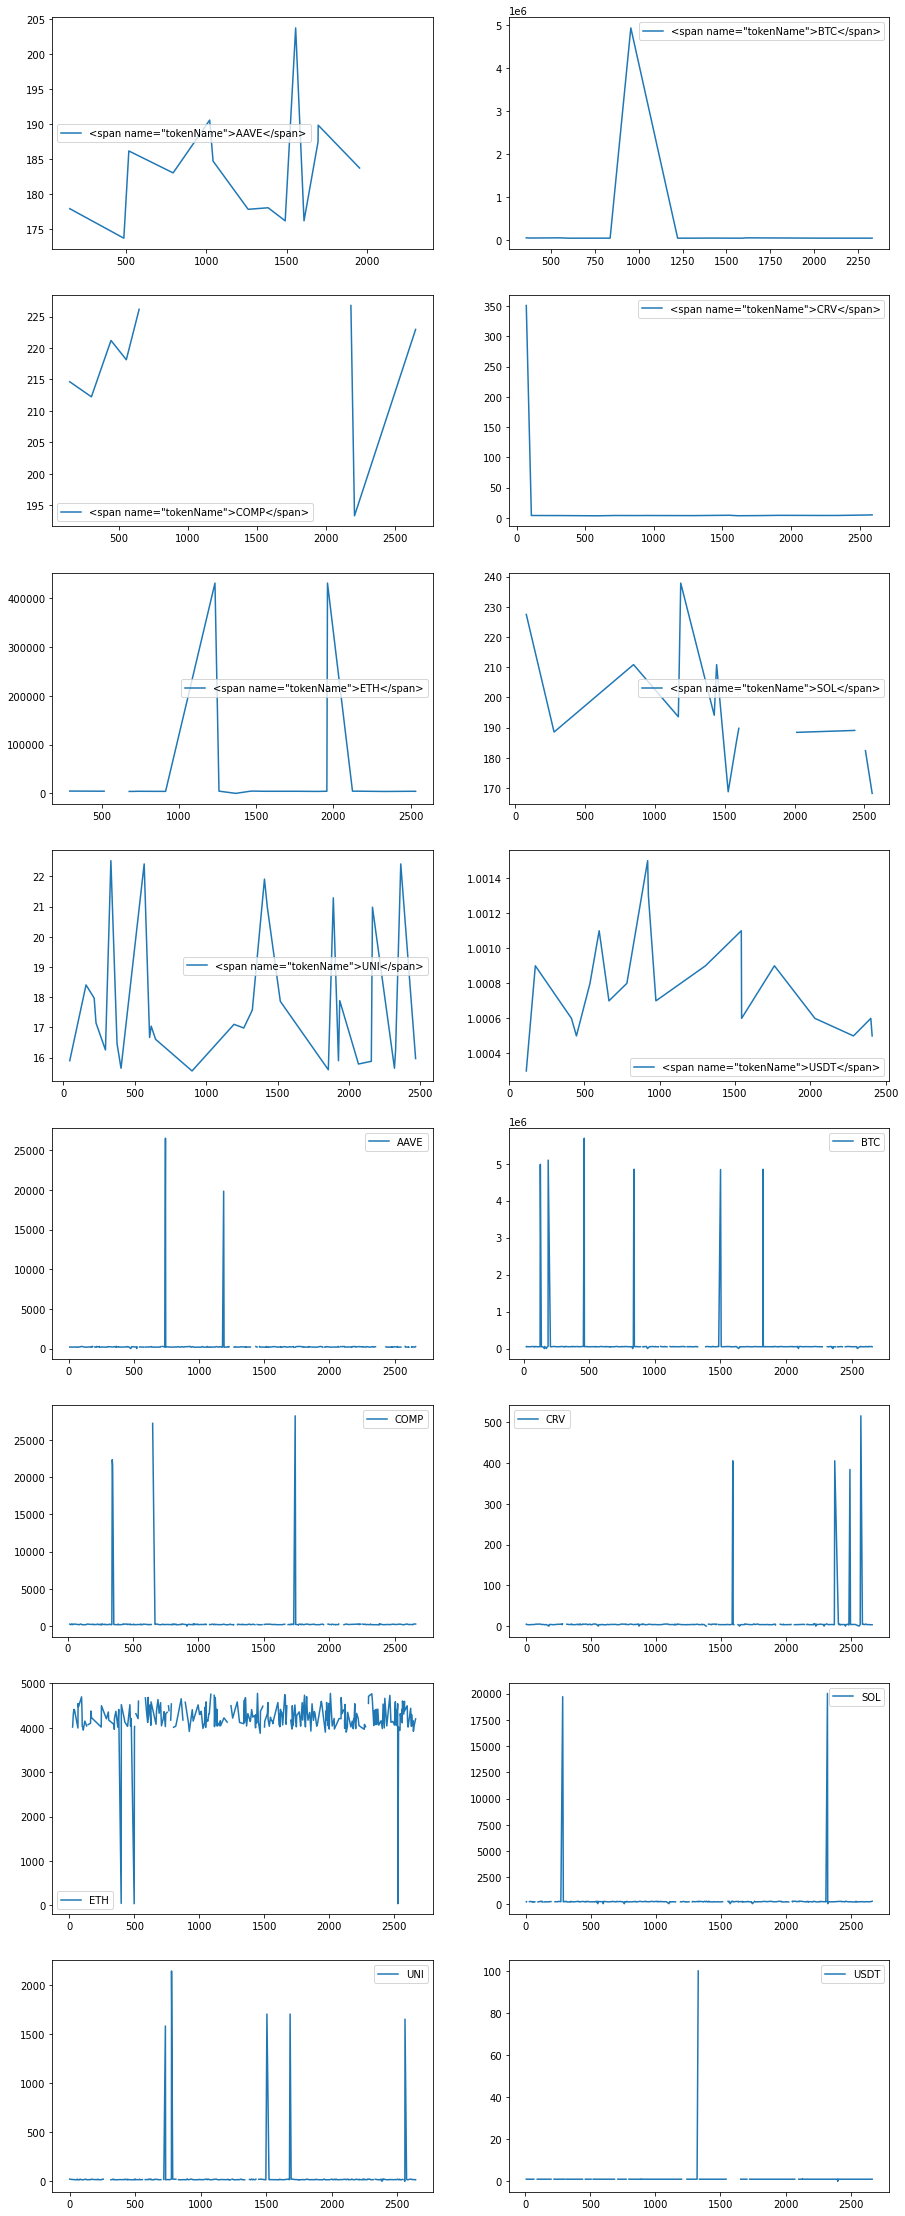

In [10]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

1. Drop duplicates

In [11]:
df = df.drop_duplicates()

In [12]:
df['token'].value_counts()

COMP                                  286
BTC                                   283
SOL                                   281
AAVE                                  280
CRV                                   279
USDT                                  278
UNI                                   270
ETH                                   270
<span name="tokenName">UNI</span>      25
<span name="tokenName">ETH</span>      25
<span name="tokenName">USDT</span>     17
<span name="tokenName">CRV</span>      16
<span name="tokenName">AAVE</span>     15
<span name="tokenName">SOL</span>      14
<span name="tokenName">BTC</span>      12
<span name="tokenName">COMP</span>      9
Name: token, dtype: int64

In [13]:
dftemp = df

In [14]:
dftemp['token'].value_counts()

COMP                                  286
BTC                                   283
SOL                                   281
AAVE                                  280
CRV                                   279
USDT                                  278
UNI                                   270
ETH                                   270
<span name="tokenName">UNI</span>      25
<span name="tokenName">ETH</span>      25
<span name="tokenName">USDT</span>     17
<span name="tokenName">CRV</span>      16
<span name="tokenName">AAVE</span>     15
<span name="tokenName">SOL</span>      14
<span name="tokenName">BTC</span>      12
<span name="tokenName">COMP</span>      9
Name: token, dtype: int64

In [15]:
dftemp.loc[dftemp['token'].str.contains('<span'), 'token'] = dftemp.loc[dftemp['token'].str.contains('<span'), 'token'].str.extract('<span(.|\n)*?<\/span>')

C:\Users\SANDEEP SINGH\anaconda3\lib\site-packages\pandas\core\indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [16]:
dftemp['token'].value_counts()

COMP    286
BTC     283
SOL     281
AAVE    280
CRV     279
USDT    278
UNI     270
ETH     270
Name: token, dtype: int64

In [17]:
df = dftemp

In [18]:
df

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,3.150215e+04,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,7.368623e+04,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,7.373675e+04,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,1.850804e+04,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,6.942691e+04,NaN,SOL,SOL
...,...,...,...,...,...,...,...,...,...
2661,2021-12-01 17:00:00,284.1400,284.8900,282.1800,282.3400,4.782140e+02,NaN,COMP,ETH
2662,2021-12-03 12:00:00,243.5040,244.4700,243.0960,243.7920,9.468390e+02,NaN,AAVE,ETH
2663,2021-12-03 07:00:00,231.1080,NaN,231.1080,234.5980,3.624890e+04,NaN,SOL,SOL
2665,2021-12-03 23:00:00,4215.0000,4249.7200,4183.2300,4198.8300,1.364579e+04,NaN,ETH,ETH


In [19]:
df['token'].value_counts()

COMP    286
BTC     283
SOL     281
AAVE    280
CRV     279
USDT    278
UNI     270
ETH     270
Name: token, dtype: int64

### 
Finding missing values

In [20]:
df.isnull().sum()

ts              0
open            0
high          450
low           256
close         116
volume          0
volumeUSD    2360
token         133
chain           0
dtype: int64

In [21]:
df.loc[df['close'].isnull(), 'close'] = 0.5 * (df.loc[df['close'].isnull(), 'high'] + df.loc[df['close'].isnull(), 'low'])

C:\Users\SANDEEP SINGH\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [22]:
df.isnull().sum()

ts              0
open            0
high          450
low           256
close          33
volume          0
volumeUSD    2360
token         133
chain           0
dtype: int64

### 
Whereever close is still null - replacing nulls with open price of those days

In [23]:
df.loc[df['close'].isnull(), 'close'] = df.loc[df['close'].isnull(), 'open']

In [24]:
df.isnull().sum()

ts              0
open            0
high          450
low           256
close           0
volume          0
volumeUSD    2360
token         133
chain           0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2360 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         2360 non-null   object 
 1   open       2360 non-null   float64
 2   high       1910 non-null   float64
 3   low        2104 non-null   float64
 4   close      2360 non-null   float64
 5   volume     2360 non-null   float64
 6   volumeUSD  0 non-null      float64
 7   token      2227 non-null   object 
 8   chain      2360 non-null   object 
dtypes: float64(6), object(3)
memory usage: 184.4+ KB


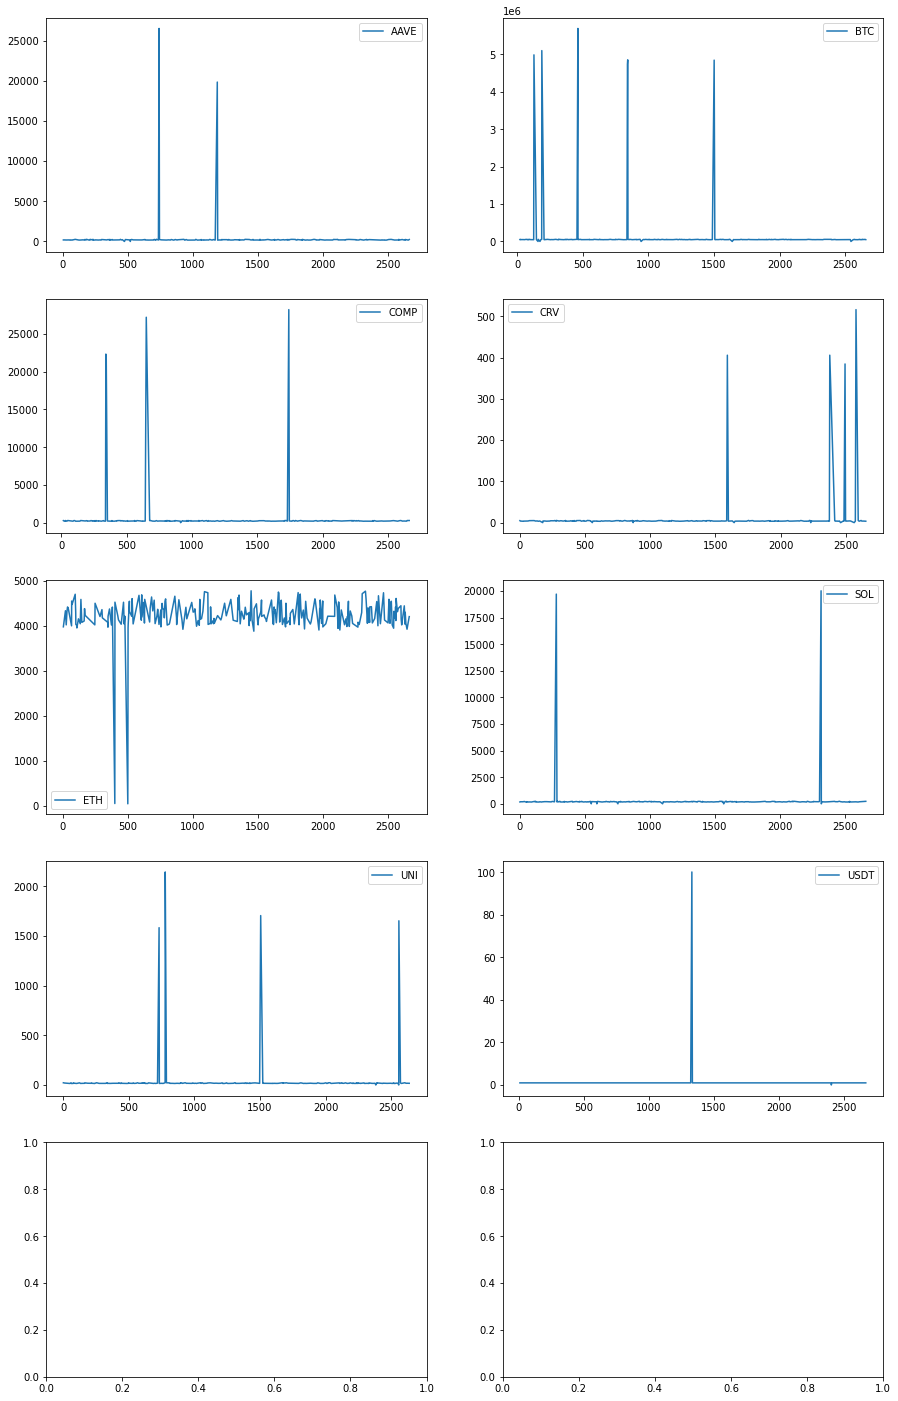

In [26]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

### 
Removing outliers

In [27]:
df.loc[df.close / df.open >= 2]

,ts,open,high,low,close,volume,volumeUSD,token,chain
71,2021-12-10 21:00:00,3.4600,3.5100,3.4600,351.00,1.080245e+05,NaN,NaN,ETH
127,2021-12-12 14:00:00,49542.3900,NaN,49534.7100,4983812.00,3.426704e+02,NaN,BTC,BTC
187,2021-12-07 08:00:00,51224.9900,51398.2600,50883.3400,5097338.00,4.433800e+02,NaN,BTC,BTC
282,2021-12-07 18:00:00,197.0930,197.8000,194.3450,19698.90,6.369084e+04,NaN,SOL,SOL
341,2021-12-08 01:00:00,223.8500,224.9800,220.3900,22333.00,1.477532e+03,NaN,COMP,ETH
344,2021-12-08 12:00:00,214.8900,217.1000,212.3800,21568.00,2.372441e+03,NaN,COMP,ETH
462,2021-12-02 23:00:00,56904.6500,56952.8100,56639.4900,5688883.00,3.821792e+02,NaN,BTC,BTC
650,2021-12-02 02:00:00,269.7800,272.1200,268.2900,27212.00,4.564180e+02,NaN,COMP,ETH
730,2021-12-06 07:00:00,16.0391,16.2298,15.8308,1584.74,7.441640e+04,NaN,UNI,ETH
741,2021-12-01 11:00:00,266.9360,267.9630,264.2370,26501.50,1.018631e+03,NaN,AAVE,ETH


In [28]:
df.loc[df.close / df.open >= 2, 'close'] = 0.5 * (df.loc[df.close / df.open >= 2, 'high'] + df.loc[df.close / df.open >= 2, 'low'])

C:\Users\SANDEEP SINGH\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


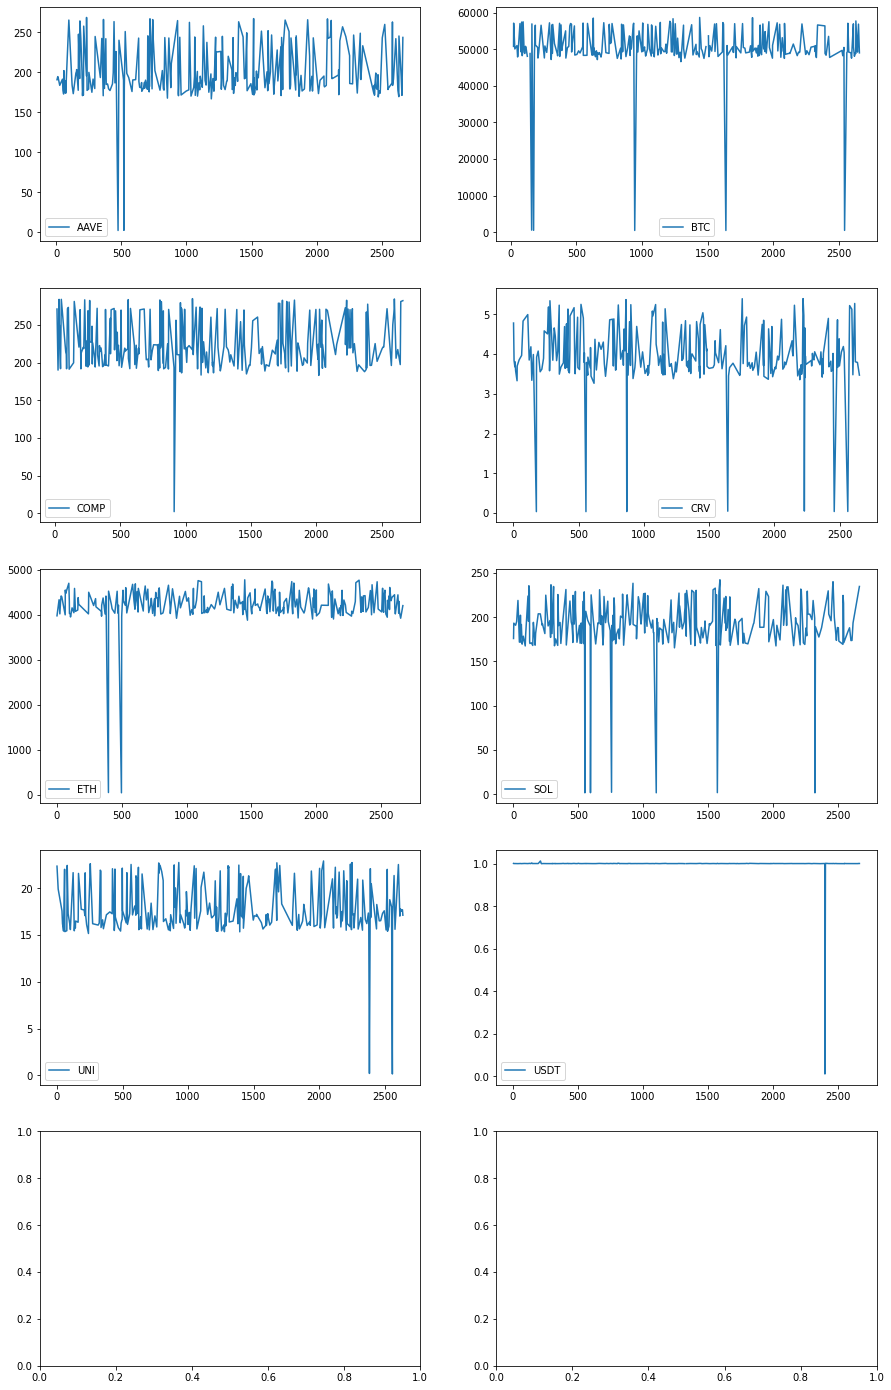

In [29]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

In [30]:
df.loc[df.open / df.close >= 2]

,ts,open,high,low,close,volume,volumeUSD,token,chain
158,2021-12-03 12:00:00,56891.7000,57209.7000,56858.0200,570.337400,1.897550e+02,NaN,BTC,BTC
173,2021-12-07 07:00:00,50941.5000,51272.8300,50936.0500,512.250000,3.124719e+02,NaN,BTC,BTC
176,2021-12-06 01:00:00,3.6302,3.6365,3.4638,0.035758,4.227913e+05,NaN,CRV,ETH
399,2021-12-03 08:00:00,4584.3400,4588.0300,4548.0600,45.722700,2.468821e+03,NaN,ETH,ETH
475,2021-12-02 08:00:00,245.8090,247.5180,245.7290,2.467160,3.166740e+02,NaN,AAVE,ETH
499,2021-12-10 23:00:00,3996.1700,NaN,3953.7700,39.613200,8.379371e+03,NaN,ETH,ETH
520,2021-12-01 17:00:00,265.2620,NaN,262.9060,2.632300,9.809190e+02,NaN,AAVE,ETH
551,2021-12-11 12:00:00,171.8500,172.4100,169.9900,1.700800,1.572705e+04,NaN,SOL,SOL
556,2021-12-10 08:00:00,3.5900,3.6300,3.5400,0.035700,1.034540e+05,NaN,CRV,ETH
594,2021-12-09 21:00:00,181.3980,181.9630,178.7750,1.809360,1.044998e+05,NaN,SOL,SOL


In [31]:
df.loc[df.open / df.close >= 2, 'close'] = 0.5 * (df.loc[df.open / df.close >= 2, 'high'] + df.loc[df.open / df.close >= 2, 'low'])

C:\Users\SANDEEP SINGH\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


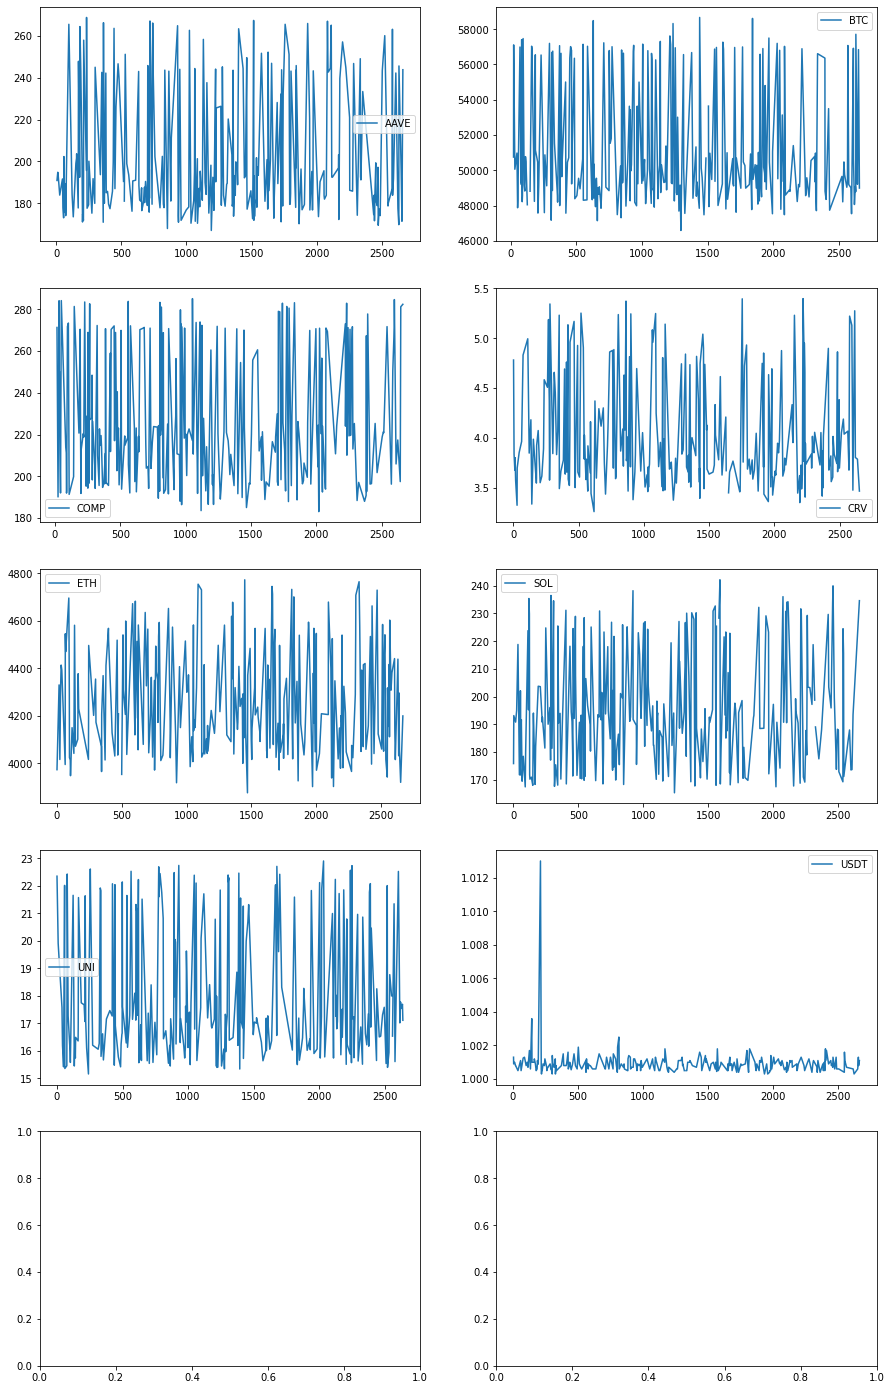

In [32]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

In [33]:
df.loc[df.open / df.close >= 2]

,ts,open,high,low,close,volume,volumeUSD,token,chain


#### Calculate VolumeUSD by chain

In [34]:
df.head()

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,31502.151631,NaN,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,73686.230000,NaN,CRV,ETH
2,2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,73736.747000,NaN,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,18508.040102,NaN,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,69426.909000,NaN,SOL,SOL


In [35]:
df["volumeUSD"] = df['close']*df['volume']

C:\Users\SANDEE~1\AppData\Local\Temp/ipykernel_3968/513649582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["volumeUSD"] = df['close']*df['volume']


In [36]:
df

,ts,open,high,low,close,volume,volumeUSD,token,chain
0,2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,3.150215e+04,7.041235e+05,UNI,ETH
1,2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,7.368623e+04,3.522644e+05,CRV,ETH
2,2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,7.373675e+04,1.296734e+07,SOL,SOL
3,2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,1.850804e+04,7.352023e+07,ETH,ETH
4,2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,6.942691e+04,1.341009e+07,SOL,SOL
...,...,...,...,...,...,...,...,...,...
2661,2021-12-01 17:00:00,284.1400,284.8900,282.1800,282.3400,4.782140e+02,1.350189e+05,COMP,ETH
2662,2021-12-03 12:00:00,243.5040,244.4700,243.0960,243.7920,9.468390e+02,2.308318e+05,AAVE,ETH
2663,2021-12-03 07:00:00,231.1080,NaN,231.1080,234.5980,3.624890e+04,8.503920e+06,SOL,SOL
2665,2021-12-03 23:00:00,4215.0000,4249.7200,4183.2300,4198.8300,1.364579e+04,5.729636e+07,ETH,ETH


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2360 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         2360 non-null   object 
 1   open       2360 non-null   float64
 2   high       1910 non-null   float64
 3   low        2104 non-null   float64
 4   close      2349 non-null   float64
 5   volume     2360 non-null   float64
 6   volumeUSD  2349 non-null   float64
 7   token      2227 non-null   object 
 8   chain      2360 non-null   object 
dtypes: float64(6), object(3)
memory usage: 184.4+ KB


In [38]:
# Group by chain


df_chain = df.groupby(['ts', 'chain']).agg({'volumeUSD': ['sum']})
df_chain.columns = ["_".join(x) for x in df_chain.columns.ravel()]
df_chain = df_chain.reset_index()
df_chain

C:\Users\SANDEE~1\AppData\Local\Temp/ipykernel_3968/886338364.py:5: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  df_chain.columns = ["_".join(x) for x in df_chain.columns.ravel()]


,ts,chain,volumeUSD_sum
0,2021-12-01 00:00:00,BTC,2.213880e+07
1,2021-12-01 00:00:00,ETH,3.057435e+07
2,2021-12-01 00:00:00,SOL,1.461392e+07
3,2021-12-01 00:00:00,USDT,1.589673e+06
4,2021-12-01 01:00:00,BTC,3.455784e+07
...,...,...,...
1175,2021-12-13 05:00:00,USDT,2.180062e+06
1176,2021-12-13 06:00:00,BTC,6.051271e+06
1177,2021-12-13 06:00:00,ETH,5.721253e+06
1178,2021-12-13 06:00:00,SOL,1.876120e+06
